![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 1 and Session 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (S1 - S2)

Open Anti's notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antiantono/bts-dsf-anti/blob/main/assignments/S1S2_Exercise_AA_v2.ipynb)

## Exercise 1: CSV

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

1. Download raw data from http://jb.gg/pythondevsurvey2017raw
2. Read it in pandas
3. Reproduce "What do you use Python for the most? (single answer)" chart
4. Reproduce "What do you use Python for? (multiple answers)" chart

In [ ]:
import pandas as pd
import numpy as np

###1.1. Read data and inspect dataset

In [ ]:
# read data
url = 'https://raw.githubusercontent.com/antiantono/bts-dsf-2020/main/data/pythondevsurvey2017_raw_data.csv'
survey = pd.read_csv(url)

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9506 entries, 0 to 9505
Columns: 162 entries, Is Python the main language you use for your current projects? to What country do you live in?
dtypes: float64(1), object(161)
memory usage: 11.7+ MB


In [ ]:
survey.head(3)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
survey.tail(3)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

###1.2. Locate the questions to be charted

* "What do you use Python for the most? (single answer)
* "What do you use Python for? (multiple answers)

In [ ]:
# Get full list of column index and names to find the questions for the exercise
for i in survey.columns:
    print(survey.columns.get_loc(i)," ",i)

0   Is Python the main language you use for your current projects?
1   None:What other language(s) do you use?
2   Java:What other language(s) do you use?
3   JavaScript:What other language(s) do you use?
4   C/C++:What other language(s) do you use?
5   PHP:What other language(s) do you use?
6   C#:What other language(s) do you use?
7   Ruby:What other language(s) do you use?
8   Bash / Shell:What other language(s) do you use?
9   Objective-C:What other language(s) do you use?
10   Go:What other language(s) do you use?
11   Visual Basic:What other language(s) do you use?
12   Scala:What other language(s) do you use?
13   SQL:What other language(s) do you use?
14   Kotlin:What other language(s) do you use?
15   R:What other language(s) do you use?
16   Swift:What other language(s) do you use?
17   Clojure:What other language(s) do you use?
18   Perl:What other language(s) do you use?
19   Rust:What other language(s) do you use?
20   Groovy:What other language(s) do you use?
21   TypeScr

In [ ]:
# Found the block of variables needed - copied here for reference
# Multicode questions from index 25 to 40, single code question at index 41
# 25   Educational purposes: What do you use Python for?
# 26   Data analysis: What do you use Python for?
# 27   DevOps / System administration / Writing automation scripts: What do you use Python for?
# 28   Software testing / Writing automated tests: What do you use Python for?
# 29   Software prototyping: What do you use Python for?
# 30   Web development: What do you use Python for?
# 31   Machine learning: What do you use Python for?
# 32   Mobile development: What do you use Python for?
# 33   Desktop development: What do you use Python for?
# 34   Computer graphics: What do you use Python for?
# 35   Network programming: What do you use Python for?
# 36   Game development: What do you use Python for?
# 37   Multimedia applications development: What do you use Python for?
# 38   Embedded development: What do you use Python for?
# 39   Programming of web parsers / scrapers / crawlers: What do you use Python for?
# 40   Other - Write In:: What do you use Python for?
# 41   What do you use Python for the most?

###1.3. Plot : What do you use Python for the most? (single answer)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

In [ ]:
# Get the relevant variable and check
sc = survey.iloc[:,41]
sc.value_counts()

Web development                                                2112
Data analysis                                                  1430
Educational purposes                                            763
DevOps / System administration / Writing automation scripts     754
Machine learning                                                696
Desktop development                                             458
Programming of web parsers / scrapers / crawlers                300
Other - Write In:                                               284
Software testing / Writing automated tests                      275
Network programming                                             268
Software prototyping                                            241
Game development                                                191
Computer graphics                                               143
Embedded development                                            114
Mobile development                              

In [ ]:
# Prepare the series for plotting : rounded percentage, top 10 values
values = np.round(100*sc.value_counts(normalize=True))
values = values[:10]
values

Web development                                                26.0
Data analysis                                                  18.0
Educational purposes                                            9.0
DevOps / System administration / Writing automation scripts     9.0
Machine learning                                                9.0
Desktop development                                             6.0
Programming of web parsers / scrapers / crawlers                4.0
Other - Write In:                                               4.0
Software testing / Writing automated tests                      3.0
Network programming                                             3.0
Name: What do you use Python for the most?, dtype: float64

In [ ]:
# Relabel the indexes for plotting
values.index = ['26%  Web development',
                '18%  Data analysis',
                ' 9%  Machine learning',
                ' 9%  DevOps / System administration / Writing automation scripts',
                ' 9%  Educational purposes',
                ' 6%  Desktop development',
                ' 4%  Other',
                ' 4%  Programming of web parsers / scrapers / crawlers',
                ' 3%  Software prototyping',
                ' 3%  Network programming']

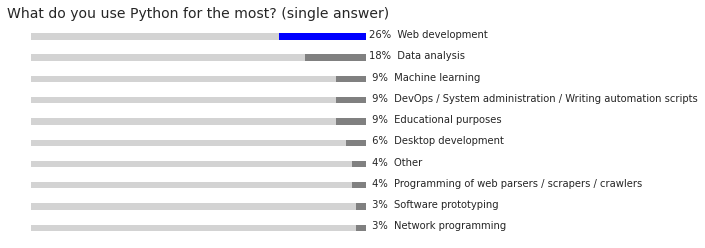

In [ ]:
# Bar plot input
# values.index --> y axis (labels)
# values --> bar width (data in colours)
# full --> dummy series to display full bar in light grey
full = [100] * 10

# Plot
fig,ax = plt.subplots(1,1)
ax1 = ax.twinx()
ax1.barh(y=values.index, width=values, align='edge', color = 'grey', lw=0, height=.3)[0].set_color('blue')
ax.barh(y=values.index, width=full, color = 'lightgrey', lw=0, height=.3)

# Display
ax.set_title('What do you use Python for the most? (single answer)',fontsize=14)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0,width=0)
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.set(xlim=(100,0))
ax1.tick_params(length=0,width=0)
sns.despine(bottom = True, left = True)

###1.4. Plot : What do you use Python for? (multiple answers)

In [ ]:
# Get the relevant variables and check
mc = survey.iloc[:,25:41]
mc.describe().transpose()

,count,unique,top,freq
Educational purposes: What do you use Python for?,2279,1,Educational purposes,2279
Data analysis: What do you use Python for?,4057,1,Data analysis,4057
DevOps / System administration / Writing automation scripts: What do you use Python for?,2827,1,DevOps / System administration / Writing autom...,2827
Software testing / Writing automated tests: What do you use Python for?,2141,1,Software testing / Writing automated tests,2141
Software prototyping: What do you use Python for?,1779,1,Software prototyping,1779
Web development: What do you use Python for?,3991,1,Web development,3991
Machine learning: What do you use Python for?,2542,1,Machine learning,2542
Mobile development: What do you use Python for?,454,1,Mobile development,454
Desktop development: What do you use Python for?,1599,1,Desktop development,1599
Computer graphics: What do you use Python for?,838,1,Computer graphics,838


In [ ]:
# Labels are long - rename to shorter labels
mc.columns = ['Educational purposes',
              'Data Analysis',
              'DevOps / System administration / Writing automation scripts',
              'Software testing / Writing automated tests',
              'Software prototyping',
              'Web development',
              'Machine learning',
              'Mobile development',
              'Desktop development',
              'Computer graphics',
              'Network programming',
              'Game development',
              'Multimedia applications development',
              'Embedded development',
              'Programming of web parsers / scrapers / crawlers',
              'Other']

In [ ]:
# Drop responses without any answers >> use as new base for percentage
mc = mc.dropna(how='all')

In [ ]:
# Prepare the series for plotting : rounded percentage, sort
values2 = np.round(100 * mc.count() / len(mc))
values2.sort_values(ascending=False,inplace=True)
values2

Data Analysis                                                  50.0
Web development                                                49.0
DevOps / System administration / Writing automation scripts    35.0
Programming of web parsers / scrapers / crawlers               32.0
Machine learning                                               31.0
Educational purposes                                           28.0
Software testing / Writing automated tests                     26.0
Software prototyping                                           22.0
Network programming                                            21.0
Desktop development                                            20.0
Computer graphics                                              10.0
Game development                                                9.0
Other                                                           7.0
Embedded development                                            7.0
Mobile development                              

In [ ]:
# Prepare the series for plotting : get top 9
values2 = values2[:9]
values2

Data Analysis                                                  50.0
Web development                                                49.0
DevOps / System administration / Writing automation scripts    35.0
Programming of web parsers / scrapers / crawlers               32.0
Machine learning                                               31.0
Educational purposes                                           28.0
Software testing / Writing automated tests                     26.0
Software prototyping                                           22.0
Network programming                                            21.0
dtype: float64

In [ ]:
# Relabel the indexes for plotting
values2.index = ['50%  Data analysis',
                 '49%  Web development',
                 '35%  DevOps / System administration / Writing automation scripts',
                 '32%  Programming of web parsers / scrapers / crawlers',
                 '31%  Machine learning',
                 '28%  Educational purposes',
                 '26%  Software testing / Writing automated tests',
                 '22%  Software prototyping',
                 '21%  Network programming']

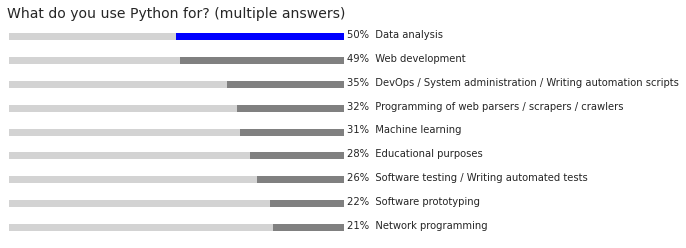

In [ ]:
# Bar plot input
# values2.index --> y axis (labels)
# values2 --> bar width (data in colours)
# full --> dummy series to display full bar in light grey
full2 = [100] * 9

# Plot
fig,ax = plt.subplots(1,1)
ax1 = ax.twinx()
ax1.barh(y=values2.index, width=values2, align='edge', color='grey', lw=0, height=.3)[0].set_color('blue')
ax.barh(y=values2.index, width=full2, color='lightgrey', lw=0, height=.3)

# Display
ax.set_title('What do you use Python for? (multiple answers)',fontsize=14)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0,width=0)
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.set(xlim=(100,0))
ax1.tick_params(length=0,width=0)
sns.despine(bottom = True, left = True)

# Exercise 2: slicing arrays

Given the array provided in the next cell. Do the following with slicing (check the other notebooks for examples)



*   Print the whole array using slice
*   Print number 12
*   Reverse the array
*   Reverse only one row in the array
*   Slice the first three columns in the array
*   Slice the last three columns and reverse them
*   Slice the last two rows and print them
*   Slice the last integers in a row
*   Slice rows and columns


[Here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) some good examples ;-)





In [ ]:
import numpy as np
a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)
nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
# Print the whole array using slice
print(nd_a.reshape(1,20))

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]]


In [ ]:
# Print the whole array using slice - alternatively
print(nd_a[0],nd_a[1],nd_a[2],nd_a[3])

[1 2 3 4 5] [ 6  7  8  9 10] [11 12 13 14 15] [16 17 18 19 20]


In [ ]:
# Print number 12
nd_a[2][1]

12

In [ ]:
# Reverse the array
nd_a[::-1,::-1]

array([[20, 19, 18, 17, 16],
       [15, 14, 13, 12, 11],
       [10,  9,  8,  7,  6],
       [ 5,  4,  3,  2,  1]])

In [ ]:
# Reverse only one row in the array - e.g. first row
nd_a[0][::-1]

array([5, 4, 3, 2, 1])

In [ ]:
# Slice the first three columns in the array
nd_a[:,:3]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [ ]:
# Slice the last three columns and reverse them
nd_a[:,:-4:-1]

array([[ 5,  4,  3],
       [10,  9,  8],
       [15, 14, 13],
       [20, 19, 18]])

In [ ]:
# Slice the last two rows and print them
print(nd_a[-2:])

[[11 12 13 14 15]
 [16 17 18 19 20]]


In [ ]:
# Slice the last integers in a row
nd_a[:,-1:]

array([[ 5],
       [10],
       [15],
       [20]])

In [ ]:
# Slice rows and columns - eg first two rows, first two columns
nd_a[:2,:2]

array([[1, 2],
       [6, 7]])

# Exercise 3: when is best to bike alone?

Given the bike dataset:

* Download the Dataset using curl
* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * When are the busiest hours per week in Total?
    * Where will you be more comfortable (alone) riding during the week in West or East?
    * What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?
    * What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?

###3.1. Download dataset

In [1]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4271k    0 4271k    0     0   317k      0 --:--:--  0:00:13 --:--:--  370k


###3.2. Open dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
bike.head(3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0


In [4]:
# Simplify : relabel
bike.columns = ['Total','East','West']
bike.head(3)

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0


###3.3. Display dataset

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 
seaborn.set_theme()

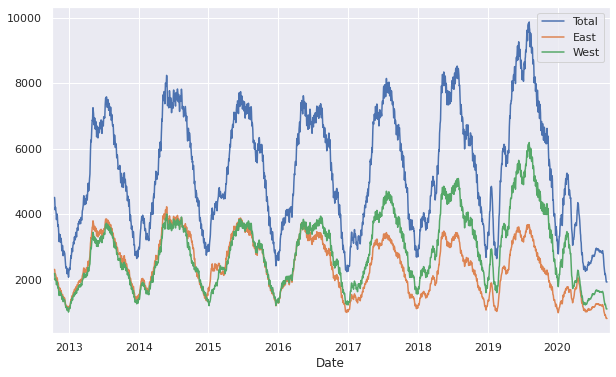

In [ ]:
# Plot 30-day rolling average
daily = bike.resample('D').sum()
daily.rolling(30,center=True).mean().plot(figsize=(10,6))

###3.4. Answering questions about dataset

In [ ]:
# Quick check: nb of valid entries
print("Total rows: ",len(bike),"\nTotal rows without NA: ",len(bike.dropna()))
bike.dropna().describe()

Total rows:  136334 
Total rows without NA:  136313


,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [ ]:
# Quick check: date index range from top and bottom entry
print("Earliest   :",bike.index[0],"\nLatest     :",bike.index[-1])

Earliest   : 2012-10-03 00:00:00 
Latest     : 2020-09-30 23:00:00


<h5>3.3.1. When are the busiest hours per week in Total?</h5>

In [ ]:
# Average by day of week : busiest day based on total traffic is Tuesday
by_day = bike.groupby(bike.index.weekday).mean()
by_day.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
by_day

,Total,East,West
Mon,131.812012,58.526819,73.285193
Tue,140.330832,62.576721,77.754111
Wed,139.217761,62.118816,77.098945
Thu,132.462131,59.495177,72.966954
Fri,119.822713,53.746660,66.076053
Sat,64.348798,32.259659,32.089139
Sun,62.697034,31.820523,30.876510


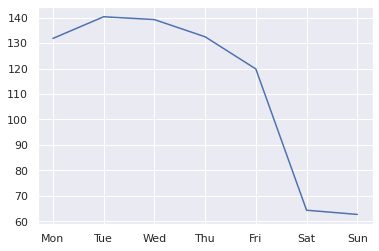

In [ ]:
by_day['Total'].plot()

In [ ]:
# Which hour on Tuesday in particular? Check average by day and hours 
by_day_time = bike.groupby([bike.index.weekday,bike.index.time]).mean()
by_day_time

Total       East       West
Date                                          
0    00:00:00   7.054254   2.985203   4.069051
     01:00:00   3.350185   1.471023   1.879162
     02:00:00   2.367448   1.193588   1.173859
     03:00:00   2.278668   1.213317   1.065351
     04:00:00   7.257707   3.891492   3.366215
...                  ...        ...        ...
6    19:00:00  54.573366  26.940814  27.632552
     20:00:00  38.829840  18.679408  20.150432
     21:00:00  25.451295  11.961776  13.489519
     22:00:00  17.879162   7.776819  10.102343
     23:00:00  12.226880   4.877928   7.348952

[168 rows x 3 columns]

In [ ]:
# Relabel the index
days = ['Mon']*24 + ['Tue']*24 + ['Wed']*24 + ['Thu']*24 + ['Fri']*24 + ['Sat']*24 + ['Sun']*24
hrs = 7*(np.arange(0,24).tolist())
day_hrs = tuple(zip(days,hrs))
day_hrs_idx = pd.MultiIndex.from_tuples(day_hrs)

In [ ]:
by_day_time.index = day_hrs_idx
by_day_time.head()

Total      East      West
Mon 0  7.054254  2.985203  4.069051
    1  3.350185  1.471023  1.879162
    2  2.367448  1.193588  1.173859
    3  2.278668  1.213317  1.065351
    4  7.257707  3.891492  3.366215

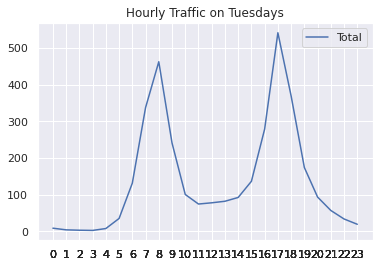

In [ ]:
# Plot Tuesday traffic : busiest time is at 5pm
by_day_time.loc['Tue',['Total']].plot(xticks=hrs, title='Hourly Traffic on Tuesdays')

<h5>3.3.2. Where will you be more comfortable (alone) riding during the week in West or East?</h5>

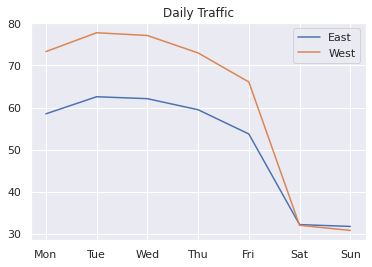

In [ ]:
# Plot East vs West : during the week, riding in the East will be more comfortable (less traffic)
by_day[['East','West']].plot(title='Daily Traffic')

<h5>3.3.3. What about riding during the business days?<br>
    When and where are the best hours to ride alone between 06:00 and 10:00?<br>
    And between 15:00 and 20:00?</h5>

In [84]:
weeksplit = np.where(bike.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bike.groupby([weeksplit, bike.index.time]).mean()

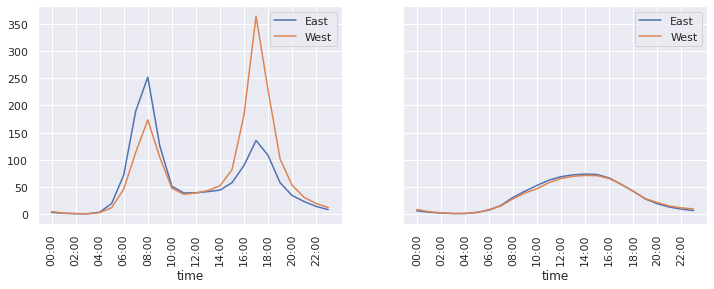

In [ ]:
# PLOT DATA : where and when is best to ride alone?
# Between 6-10am : 6am in the West on weekdays, 6am in either side on weekends
# Between 3-8pm : 8pm in the East on weekdays, 8pm in either side on weekends 
hourly_ticks = 2 * 60 * 60 * np.arange(12)
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
by_time.loc['Weekday',['East','West']].plot(ax=ax[0],xticks = hourly_ticks, rot=90)
by_time.loc['Weekend',['East','West']].plot(ax=ax[1],xticks = hourly_ticks, rot=90)

3.3.4 What happened during the coronavirus pandemic?<br>
Did the daily riding hours change?<br>
How many riders are passing through the bridge comparing 2018 and 2020?

In [101]:
# WHAT HAPPENED DURING CORONAVIRUS PANDEMIC?
# First, resample weekly data
weekly = bike.resample('W').sum()

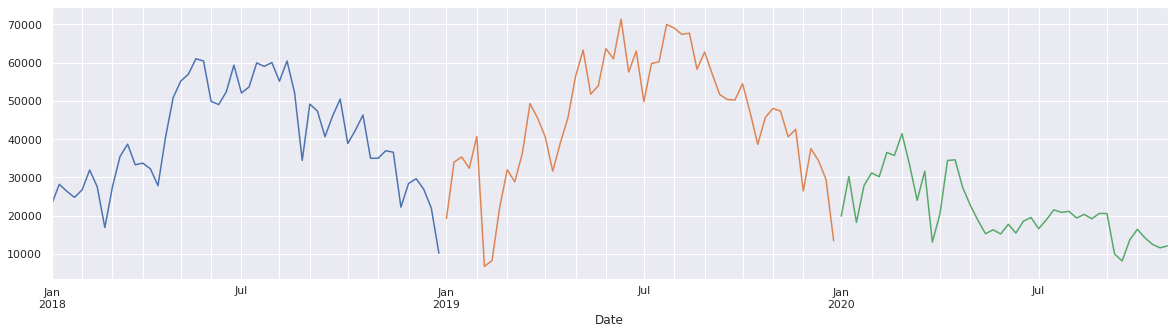

In [102]:
# Show plot in the past 3 years
# Note the steeper decline in Feb 2019 -- it was Seattle's snowiest month in 50 years, so fewer cyclists braved the snow
# In 2020, traffic was building up in Jan & Feb but then fell sharply in early March when local authorities recommended teleworking
# On March 4, Amazon and Microsoft started working from home policy, quickly followed by other corporations

plt.subplots(1,1,figsize=(20,5))
weekly[weekly.index.year == 2018]['Total'].plot()
weekly[weekly.index.year == 2019]['Total'].plot()
weekly[weekly.index.year == 2020]['Total'].plot()
plt.grid(which='minor', axis='x')
plt.show()

In [169]:
# DID DAILY RIDING HOURS CHANGE?
# Group data by year and hours, so we can compare hours in different years
by_year_time = bike.groupby([bike.index.year, bike.index.time]).mean()
by_year_time.tail()

Total       East       West
Date                                           
2020 19:00:00  116.195704  46.539379  69.656325
     20:00:00   62.059666  25.164678  36.894988
     21:00:00   34.835322  14.231504  20.603819
     22:00:00   17.978520   7.121718  10.856802
     23:00:00   10.305489   3.849642   6.455847

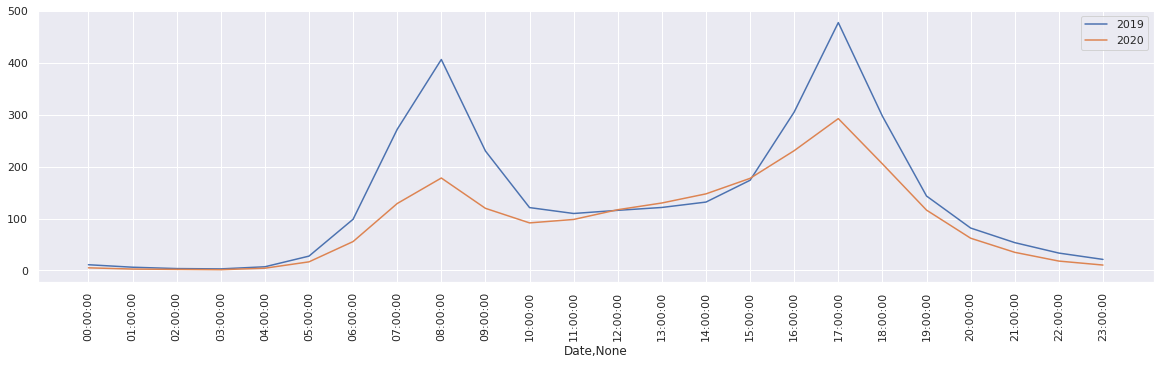

In [170]:
# Show plot 2019 vs 2020
# Although the volume of traffic is lower in 2020, the daily riding hours are the same -- they peak at 8am and 5pm
by_time_2019 = by_year_time.iloc[-48:-24]
by_time_2020 = by_year_time.iloc[-24:]

hours=[]
for year, hour in by_time_2019.index:
  hours.append(hour)

plt.subplots(1,1,figsize=(20,5))
by_time_2019['Total'].plot()
by_time_2020['Total'].plot()
plt.xticks(range(24), labels=hours, rotation=90)
plt.legend(['2019','2020'])
plt.show()

In [181]:
# HOW MANY RIDERS ARE PASSING THROUGH THE BRIDGE IN 2018 vs 2020?
# In 2018, there were ~2.1 million rides over the bridge, pasing through either side
# In 2020, the number was more than halved, to only ~942k rides
# Strictly speaking, these are the number of rides - there could have been the same riders passing through the bridge multiple times

yearly = bike.groupby(bike.index.year).sum()
yearly.loc['2018':'2020':2]

,Total,East,West
Date,,,
2018,2103760.0,851310.0,1252450.0
2020,941975.0,386278.0,555697.0


# Exercise 4: let's get rich!

Given this apple stock history [this dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv)

* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013
    * When was the peak maximum of volume of trades done?
    * When was the month with the lowest close?
    * And the lowest close of the day in the whole dataset?

<h4>4.1. Open and display dataset</h4>

In [ ]:
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv'
aapl = pd.read_csv(url, sep=',', parse_dates=True, index_col='Date')
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [ ]:
aapl.index.max()

Timestamp('2014-07-08 00:00:00')

<h4>4.2. Reply to questions</h4>

<h5>How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013</h5>

In [ ]:
buy_price = aapl.loc['2000-01-31',['Open']].sum()
sell_price = aapl.loc['2013-12-31',['Open']].sum()
print("Gains = ", 10 * (sell_price - buy_price))

Gains =  Open    4531.7
dtype: float64


<h5>When was the peak maximum of volume of trades done?</h5>

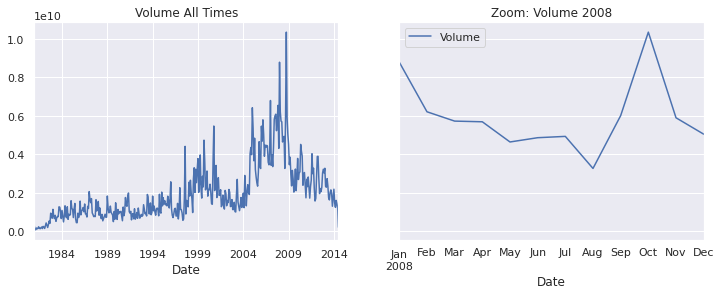

In [ ]:
# Resample and plot : max volume of trades occurred in October 2008
aapl_monthly_total = aapl.resample('M').sum()
fig, ax = plt.subplots(1,2,figsize = (12,4), sharey=True)
aapl_monthly_total['Volume'].plot(ax=ax[0],title='Volume All Times')
aapl_monthly_total.loc['2008',['Volume']].plot(ax=ax[1], title='Zoom: Volume 2008')

<h5>When was the month with the lowest close?<br>
And the lowest close of the day in the whole dataset?</h5>

In [ ]:
# Month with the lowest close : July 1982
# Lowest close of the day : $11 on 8th July, 1982
print("Lowest closing price: ",round(aapl['Close'].min(),2))
aapl[aapl['Close'] == aapl['Close'].min()]

Lowest closing price:  11.0


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1982-07-08,11.12,11.12,11.0,11.0,41081600,0.17
